### Analyzing blank images

Due to cameras being sometimes unavailable, it is necessary to split the images into two categories.

In [8]:
import os
import matplotlib.pyplot as plt
import cv2
import tqdm

# Specify the directory you want to iterate over

directory = "../SLONI_old"
# Iterate over the files and subdirectories in the given directory
for filename in tqdm.tqdm(os.listdir(directory)):
    path = os.path.join(directory, filename)
    image_np = cv2.imread(path)
    h, w, _ = image_np.shape
    assert(h == 1080 and w == 1920)
    image_np = image_np[0+35:h-45]
    cv2.imwrite(path, image_np)

  0%|          | 0/9243 [00:00<?, ?it/s]


AssertionError: 

In [27]:
import os
import shutil
import numpy as np
import tqdm

def split_files(source_dir, dest_dir_label, dest_dir_blank):
    """
    Splits files from the source directory into two directories based on content

    Parameters:
    - source_dir: Path to the source directory containing the files to be split.
    - dest_dir_label: Path to the destination directory for files with image content.
    - dest_dir_blank: Path to the destination directory for files which are blank.
    """
    # Ensure destination directories exist
    os.makedirs(dest_dir_label, exist_ok=True)
    os.makedirs(dest_dir_blank, exist_ok=True)

    # Iterate over all files in the source directory
    for filename in tqdm.tqdm(os.listdir(source_dir)):
        # Build the full file path
        file_path = os.path.join(source_dir, filename)
        image_np = cv2.imread(file_path)
        zero_pixels_count = np.sum(np.all(image_np == 0, axis=-1))
        total_pixels = image_np.shape[0] * image_np.shape[1]
        # Skip directories, only process files
        if os.path.isfile(file_path):
            # Check if the filename has content
            if zero_pixels_count/total_pixels < 0.6:
                # Move the file to dest_dir_label
                shutil.move(file_path, os.path.join(dest_dir_label, filename))
            else:
                # Move the file to dest_dir_blank
                shutil.move(file_path, os.path.join(dest_dir_blank, filename))

# Example usage
source_dir = '../SLONI_old'
dest_dir_label = '../SLONI_label'
dest_dir_blank = '../SLONI_blank'
split_files(source_dir, dest_dir_label, dest_dir_blank)


100%|██████████| 9243/9243 [07:49<00:00, 19.70it/s]


In [11]:
directory = "../SLONI_old"
# Iterate over the files and subdirectories in the given directory
for filename in tqdm.tqdm(os.listdir(directory)):
    path = os.path.join(directory, filename)
    image_np = cv2.imread(path)
    h, w, _ = image_np.shape
    assert(h == 1000 and w == 1920)

 21%|██        | 1917/9243 [00:42<02:42, 45.02it/s]


KeyboardInterrupt: 

1751706
(1000, 1920, 3)
1000 1920


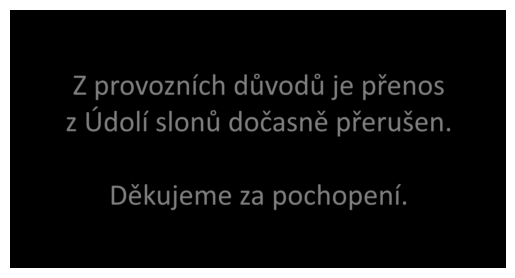

In [25]:
import numpy as np

image_np = cv2.imread("../SLONI_old/screenshot1_01_02__00_00.png")
zero_pixels_count = np.sum(np.all(image_np == 0, axis=-1))
print(zero_pixels_count)
# h, w, _ = image_np.shape
# print(h, w)
# image_np = image_np[0+35:h-45]
print(image_np.shape)
print(h, w)
image_np = cv2.resize(image_np, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Analyze blank images

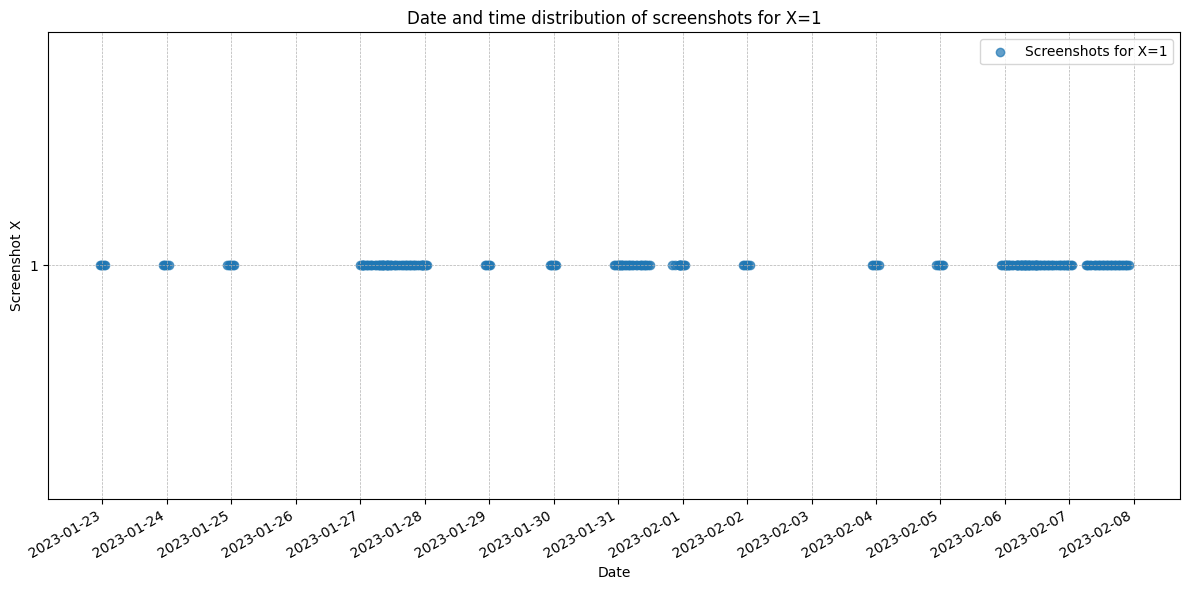

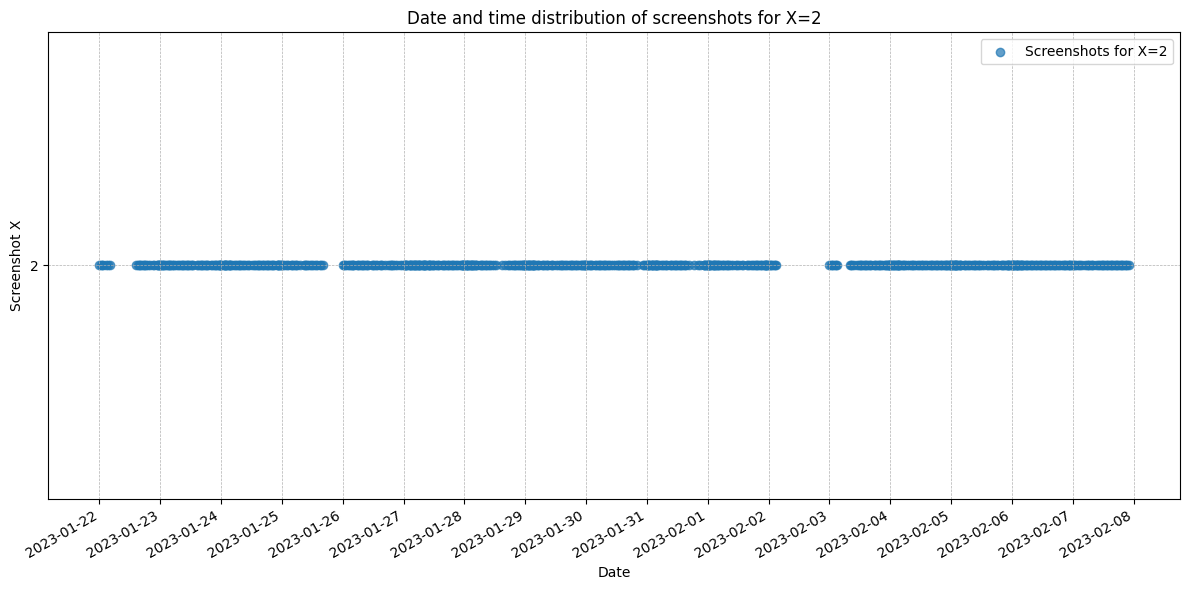

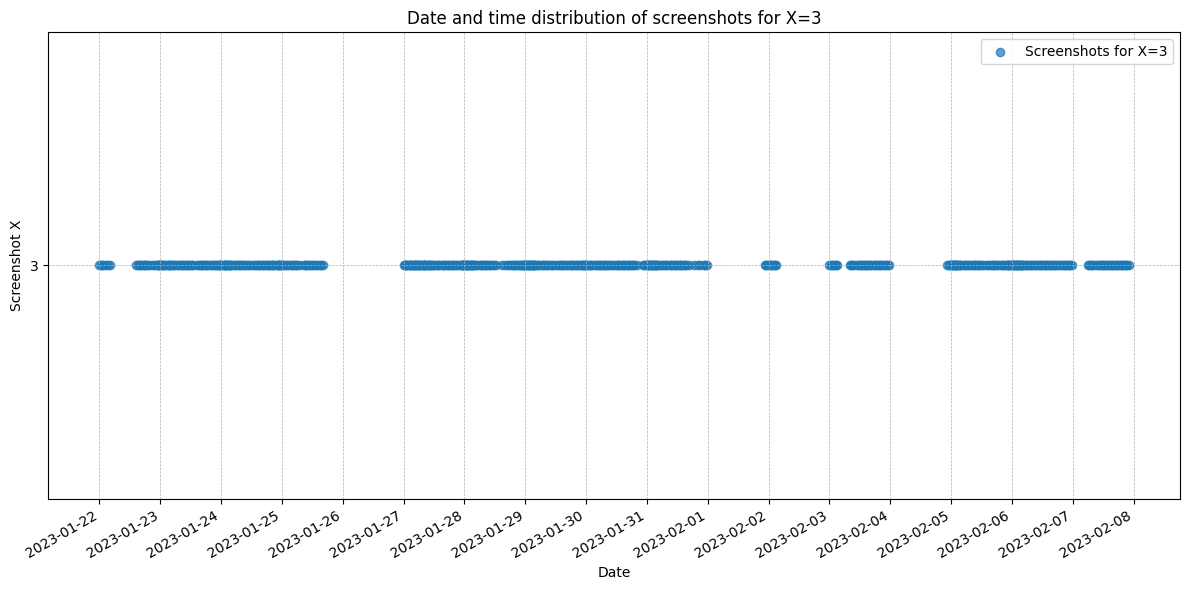

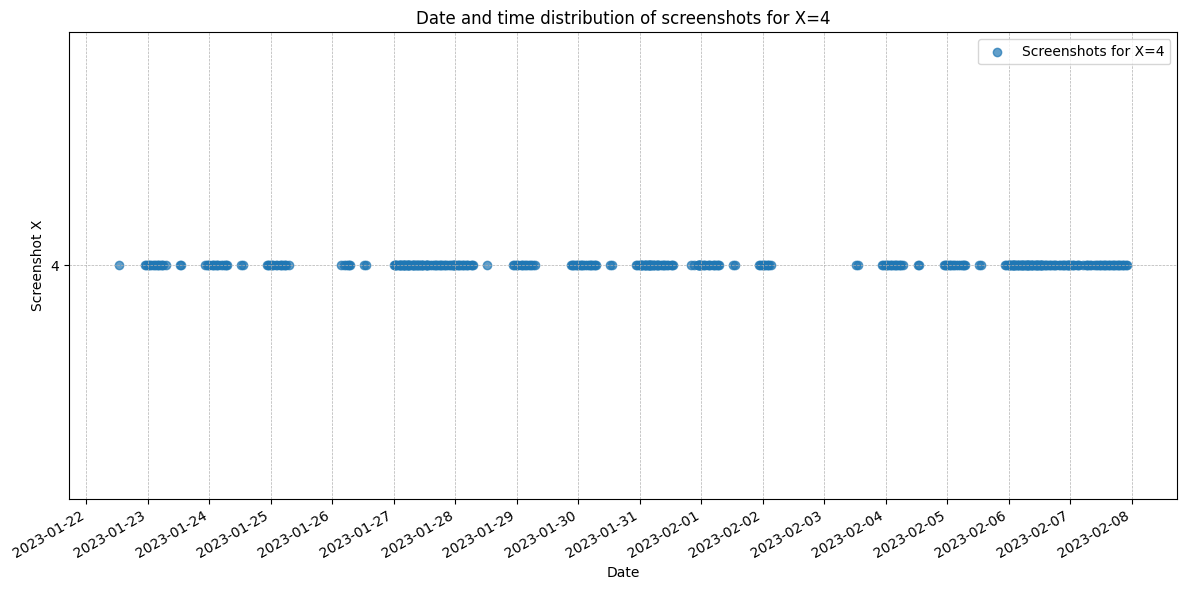

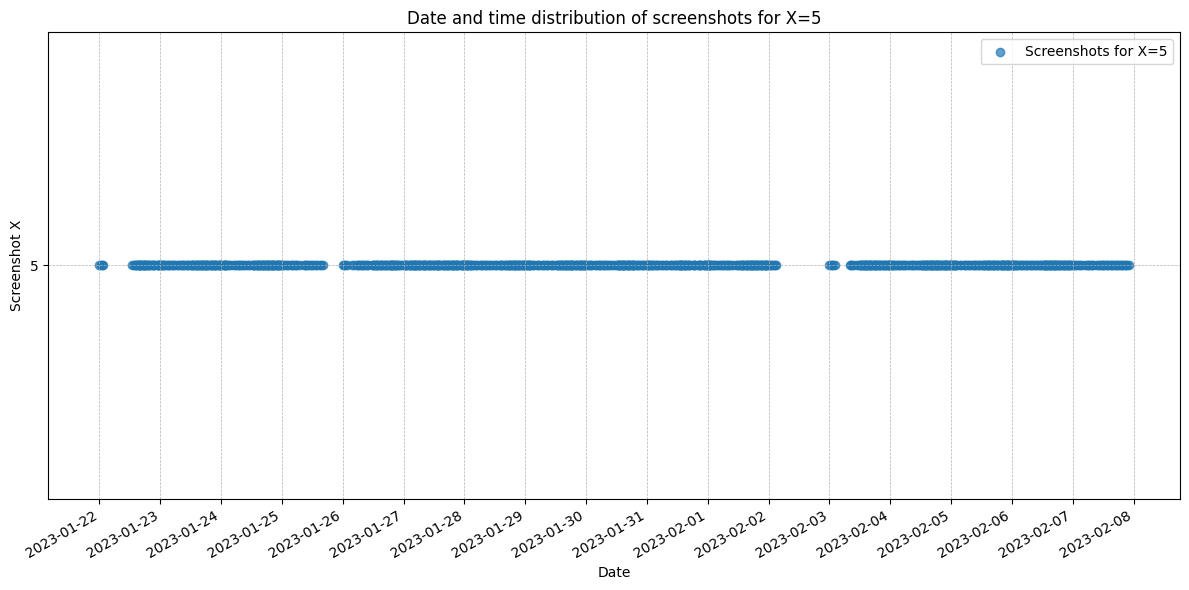

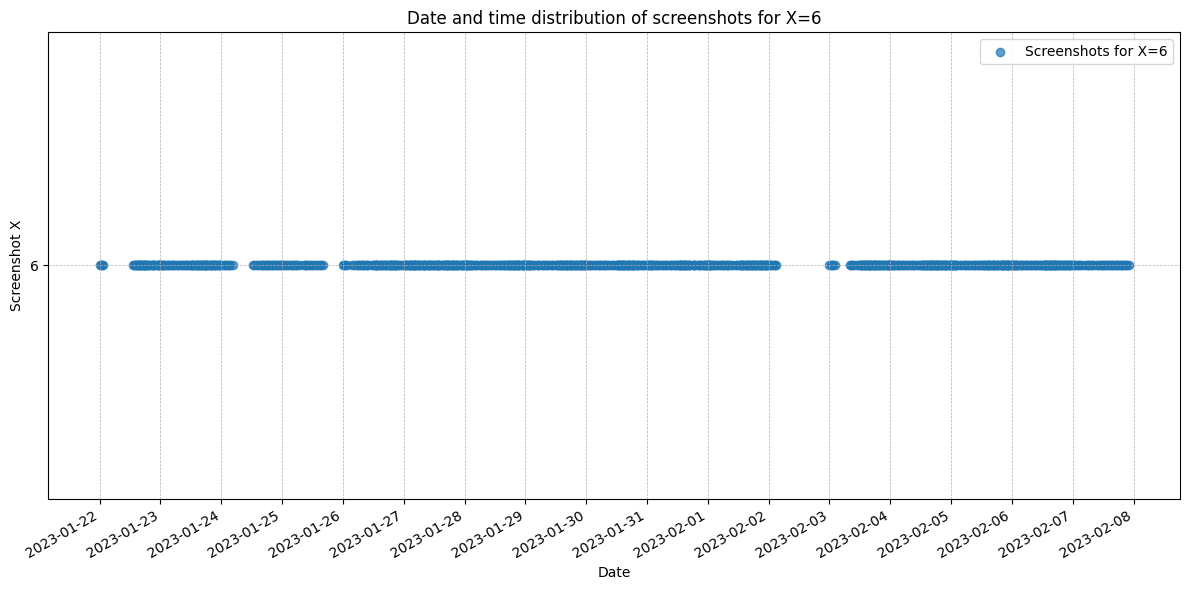

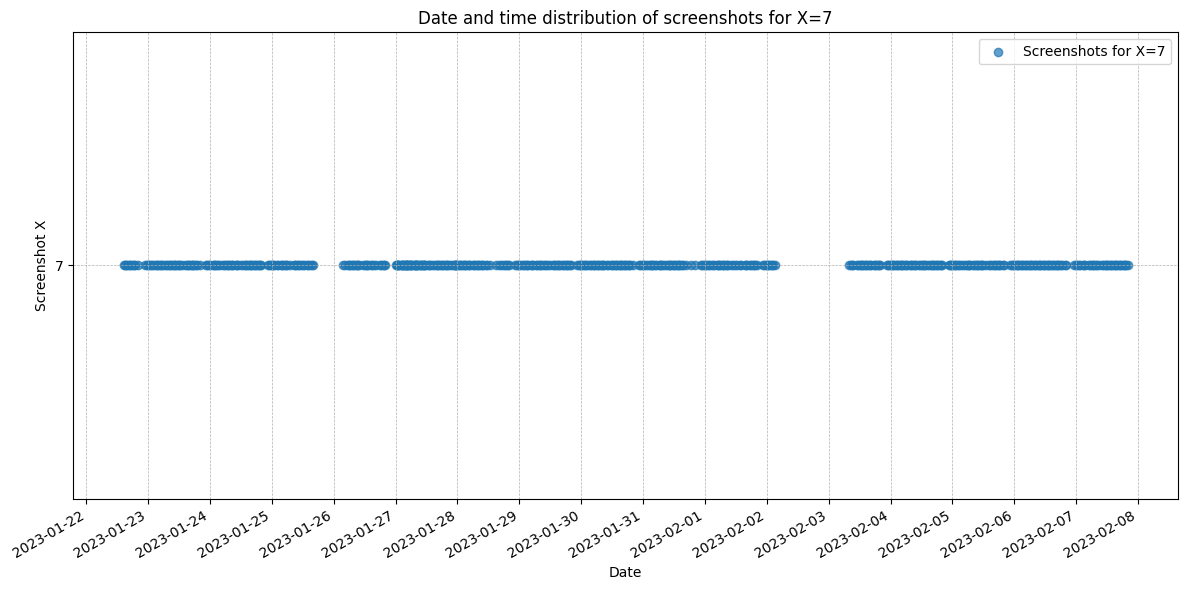

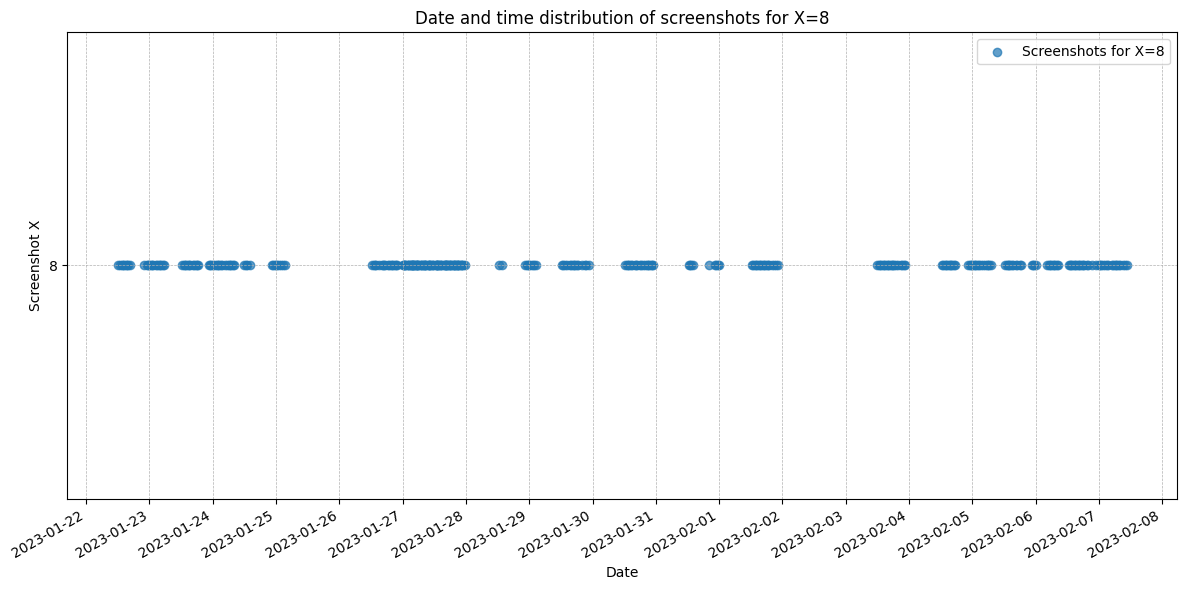

{1: [datetime.datetime(2023, 1, 22, 11, 30), datetime.datetime(2023, 1, 22, 11, 45), datetime.datetime(2023, 1, 22, 12, 0), datetime.datetime(2023, 1, 22, 12, 15), datetime.datetime(2023, 1, 22, 12, 30), datetime.datetime(2023, 1, 23, 11, 15), datetime.datetime(2023, 1, 23, 11, 30), datetime.datetime(2023, 1, 23, 11, 45), datetime.datetime(2023, 1, 23, 12, 0), datetime.datetime(2023, 1, 23, 12, 30), datetime.datetime(2023, 1, 24, 11, 15), datetime.datetime(2023, 1, 24, 11, 30), datetime.datetime(2023, 1, 24, 11, 45), datetime.datetime(2023, 1, 24, 12, 0), datetime.datetime(2023, 1, 24, 12, 15), datetime.datetime(2023, 1, 24, 12, 30), datetime.datetime(2023, 1, 26, 12, 15), datetime.datetime(2023, 1, 26, 12, 30), datetime.datetime(2023, 1, 26, 15, 45), datetime.datetime(2023, 1, 26, 16, 0), datetime.datetime(2023, 1, 26, 16, 15), datetime.datetime(2023, 1, 26, 16, 30), datetime.datetime(2023, 1, 26, 16, 45), datetime.datetime(2023, 1, 26, 17, 0), datetime.datetime(2023, 1, 26, 17, 15), 

In [31]:
import os
import re
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_image_dates_and_times(directory):
    # Regex pattern to match filenames and capture parts
    pattern = re.compile(r'screenshot(\d+)_(\d{2})_(\d{2})__(\d{2})_(\d{2})\.png')
    
    # Data structure to store the parsed data
    # {X: [datetime objects]}
    data = {}
    
    # Iterate over files in the directory
    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            X, day, month, hour, minute = map(int, match.groups())
            # Convert to datetime object
            timestamp = datetime(year=2023, month=month, day=day, hour=hour, minute=minute)
            if X not in data:
                data[X] = []
            data[X].append(timestamp)
    data = dict(sorted(data.items()))

    # Plotting
    for X, timestamps in data.items():
        # Sort timestamps
        timestamps.sort()
        
        plt.figure(figsize=(12, 6))
        
        # Convert datetime objects to matplotlib date format for plotting
        dates = [mdates.date2num(t) for t in timestamps]
        times = [(t.hour + t.minute / 60) / 24 for t in timestamps]  # Normalize time to fraction of day
        
        # Combine dates and times for plotting
        datetime_combined = [date + time for date, time in zip(dates, times)]
        
        plt.scatter(datetime_combined, [X] * len(datetime_combined), alpha=0.7, label=f'Screenshots for X={X}')
        
        plt.yticks([X])  # Only show the current X on y-axis
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.gca().xaxis.set_major_locator(mdates.DayLocator())
        plt.xlabel('Date')
        plt.ylabel('Screenshot X')
        plt.title(f'Date and time distribution of screenshots for X={X}')
        plt.gcf().autofmt_xdate()  # Rotate date labels to fit
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.legend()
        plt.tight_layout()
        plt.show()
    print(data)


plot_image_dates_and_times("../SLONI_label")
